<i>
    Roll No : B21118 <br>
    Name : Riya Arora <br>
    Assignment-7
</i>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

In [2]:
iris_df = pd.read_csv("Iris.csv")
print(iris_df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


### Question-1 : PCA

In [3]:
D = iris_df.iloc[:,:-1] # Data Matrix (excluding Class)

l = 2
pca = PCA(n_components = l)
projected = pca.fit_transform(D)

print(D.shape)
print(projected.shape)

(150, 4)
(150, 2)


In [4]:
print("The principal axes (in which direction we have maximum variance) are: ")
print(pca.components_)
print()

print("The variance explained by each component: ")
print(pca.explained_variance_)
print()

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print()


The principal axes (in which direction we have maximum variance) are: 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]

The variance explained by each component: 
[4.22484077 0.24224357]

Explained Variance Ratio:
[0.92461621 0.05301557]



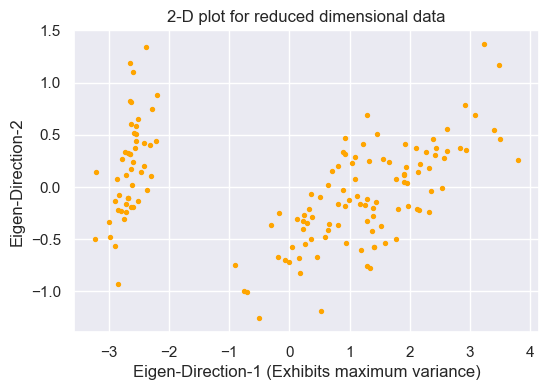

In [5]:
# Reduced 2-dimensional data Scatter Plot

plt.figure(dpi = 100)
plt.scatter(projected[:,0], projected[:,1], s = 8, c = 'orange')
plt.grid(True)
plt.xlabel("Eigen-Direction-1 (Exhibits maximum variance)")
plt.ylabel("Eigen-Direction-2")
plt.title("2-D plot for reduced dimensional data")
plt.show()


Text(0.5, 1.0, 'Principal Eigenvalues')

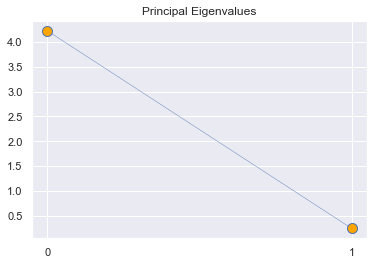

In [6]:
# Plotting Eigen-values
eig_vals = pca.explained_variance_
plt.plot(eig_vals, marker = 'o', markerfacecolor = 'orange', linewidth = 0.4, markersize = 10)
plt.xticks(range(len(eig_vals)))
plt.title("Principal Eigenvalues")

### Question-2 : K-Means Clustering for k = 3

In [7]:
# Model

K = 3
kmeans_estimator = KMeans(n_clusters = K)
kmeans_estimator.fit(projected)

kmeans_prediction = kmeans_estimator.predict(projected)

print(kmeans_prediction) #Equivalent to kmeans_estimator.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Because we have chosen k = 3, we get three clusters: each represented by either 0, 1 or 2.

In [8]:
# Getting data points which belong to each cluster- We are working on reduced dimensional data

cluster_0 = []
cluster_1 = []
cluster_2 = []
for i in range(len(kmeans_prediction)):
    if kmeans_prediction[i] == 0:
        cluster_0.append(list(projected[i]))
    elif kmeans_prediction[i] == 1:
        cluster_1.append(list(projected[i]))
    elif kmeans_prediction[i] == 2:
        cluster_2.append(list(projected[i]))

cluster_0 = np.array(cluster_0)
cluster_1 = np.array(cluster_1)
cluster_2 = np.array(cluster_2)

print(cluster_0, end = "\n\n")
print(cluster_1, end = "\n\n")
print(cluster_2, end = "\n\n")

[[ 0.93241075  0.31919809]
 [ 0.18096721 -0.82560394]
 [ 1.08713449  0.07539039]
 [ 0.64043675 -0.41732348]
 [ 1.09522371  0.28389121]
 [-0.75146714 -1.00110751]
 [ 1.04329778  0.22895691]
 [-0.01019007 -0.72057487]
 [-0.5110862  -1.26249195]
 [ 0.51109806 -0.10228411]
 [ 0.26233576 -0.5478933 ]
 [ 0.98404455 -0.12436042]
 [-0.174864   -0.25181557]
 [ 0.92757294  0.46823621]
 [ 0.65959279 -0.35197629]
 [ 0.23454059 -0.33192183]
 [ 0.94236171 -0.54182226]
 [ 0.0432464  -0.58148945]
 [ 1.11624072 -0.08421401]
 [ 0.35678657 -0.06682383]
 [ 1.29646885 -0.32756152]
 [ 0.92050265 -0.18239036]
 [ 0.71400821  0.15037915]
 [ 0.89964086  0.32961098]
 [ 1.33104142  0.24466952]
 [ 0.81245555 -0.16233157]
 [-0.30733476 -0.36508661]
 [-0.07034289 -0.70253793]
 [-0.19188449 -0.67749054]
 [ 0.13499495 -0.31170964]
 [ 1.37873698 -0.42120514]
 [ 0.58727485 -0.48328427]
 [ 0.8072055   0.19505396]
 [ 1.22042897  0.40803534]
 [ 0.81286779 -0.370679  ]
 [ 0.24519516 -0.26672804]
 [ 0.16451343 -0.67966147]
 

In [9]:
# Cluster Centers

centers = kmeans_estimator.cluster_centers_
center_0 = centers[0]
center_1 = centers[1]
center_2 = centers[2]

print(center_0)
print(center_1)
print(center_2)

[ 0.66443351 -0.33029221]
[-2.64084076  0.19051995]
[2.34645113 0.27235455]


Text(0, 0.5, 'Eigen-Direction-2')

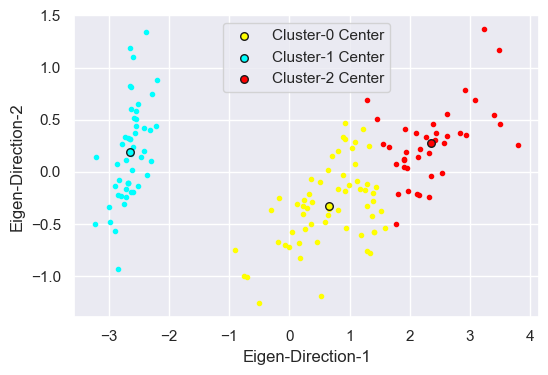

In [10]:
# Plotting clusters' data points

plt.figure(dpi = 100)

# Cluster-0
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], s = 9, c = 'yellow')
plt.scatter(center_0[0], center_0[1], c = 'yellow', s = 30, edgecolor = 'k', label = 'Cluster-0 Center')

plt.scatter(cluster_1[:, 0], cluster_1[:, 1], s = 9, c = 'cyan')
plt.scatter(center_1[0], center_1[1], c = 'cyan', s = 30, edgecolor = 'k', label = 'Cluster-1 Center')

plt.scatter(cluster_2[:, 0], cluster_2[:, 1], s = 9, c = 'red')
plt.scatter(center_2[0], center_2[1], c = 'red', s = 30, edgecolor = 'k', label = 'Cluster-2 Center')

plt.legend()
plt.xlabel("Eigen-Direction-1")
plt.ylabel("Eigen-Direction-2")

# Plotting Cluster Centers


In [11]:
# Distortion measure for this K-Means Clustering

J = 0 #Initialization

for d in cluster_0:
    temp = (d - center_0)
    J+= np.dot(temp.T, temp)
for d in cluster_1:
    temp = (d - center_1)
    J+= np.dot(temp.T, temp)
for d in cluster_2:
    temp = (d - center_2)
    J+= np.dot(temp.T, temp)

print("Distortion Measure =", J)

Distortion Measure = 63.87383806036223


#### <u> PURITY SCORE CALCULATION: </u>

In [12]:
clustered_df = iris_df.copy()
clustered_df['Cluster'] = kmeans_prediction
print(clustered_df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species  \
0              5.1           3.5            1.4           0.2     Iris-setosa   
1              4.9           3.0            1.4           0.2     Iris-setosa   
2              4.7           3.2            1.3           0.2     Iris-setosa   
3              4.6           3.1            1.5           0.2     Iris-setosa   
4              5.0           3.6            1.4           0.2     Iris-setosa   
..             ...           ...            ...           ...             ...   
145            6.7           3.0            5.2           2.3  Iris-virginica   
146            6.3           2.5            5.0           1.9  Iris-virginica   
147            6.5           3.0            5.2           2.0  Iris-virginica   
148            6.2           3.4            5.4           2.3  Iris-virginica   
149            5.9           3.0            5.1           1.8  Iris-virginica   

     Cluster  
0          1

In [13]:
class_count = pd.DataFrame([[0 for i in range(3)] for j in range(3)], index = [0, 1, 2], columns = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
print(class_count)
print()

for i in range(len(clustered_df)):
    d_cluster = clustered_df.loc[i, 'Cluster']
    d_class = clustered_df.loc[i, 'Species']
    class_count.loc[d_cluster, d_class]+= 1

print(class_count)

   Iris-setosa  Iris-versicolor  Iris-virginica
0            0                0               0
1            0                0               0
2            0                0               0

   Iris-setosa  Iris-versicolor  Iris-virginica
0            0               47              14
1           50                0               0
2            0                3              36


In [14]:
correct = class_count.max(axis = 1).sum()
total = class_count.sum().sum() # Also equal to given number of samples
purity = correct/total

print("Purity Score for Clustering =", purity)

Purity Score for Clustering = 0.8866666666666667


### Question-3: K-Means Clustering for K = 2, 3, 4, 5, 6, 7 and Elbow-Method

----------------------------------------------------------------------
K = 2



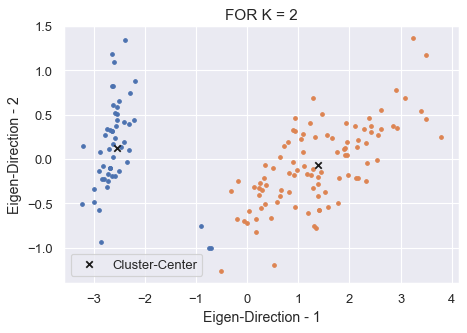


Distortion Measure = 137.15100934920733

----------------------------------------------------------------------
----------------------------------------------------------------------
K = 3



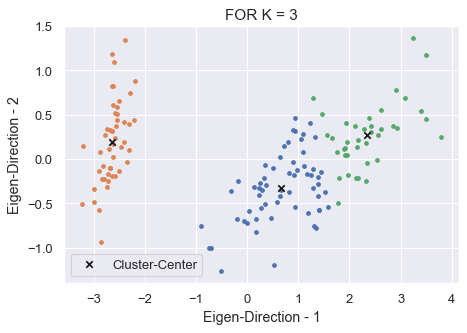


Distortion Measure = 63.87383806036223

----------------------------------------------------------------------
----------------------------------------------------------------------
K = 4



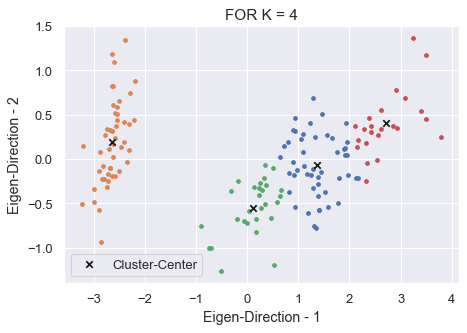


Distortion Measure = 42.32469809943968

----------------------------------------------------------------------
----------------------------------------------------------------------
K = 5



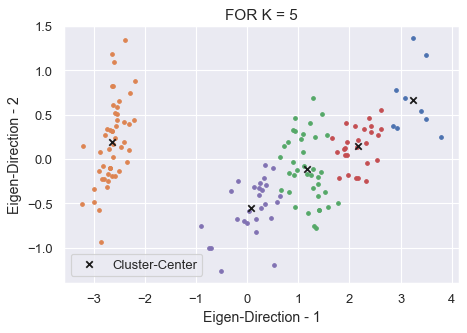


Distortion Measure = 33.63826698026688

----------------------------------------------------------------------
----------------------------------------------------------------------
K = 6



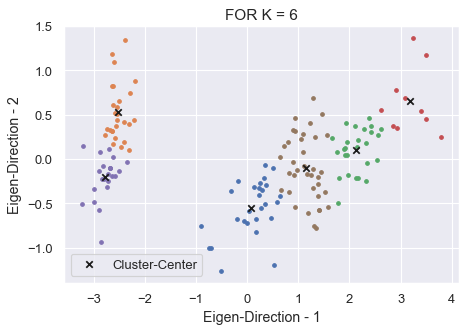


Distortion Measure = 26.041875343048527

----------------------------------------------------------------------
----------------------------------------------------------------------
K = 7



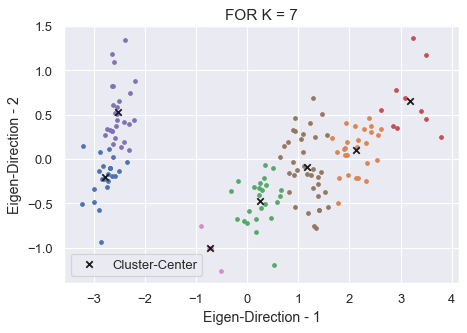


Distortion Measure = 21.92837767012765

----------------------------------------------------------------------


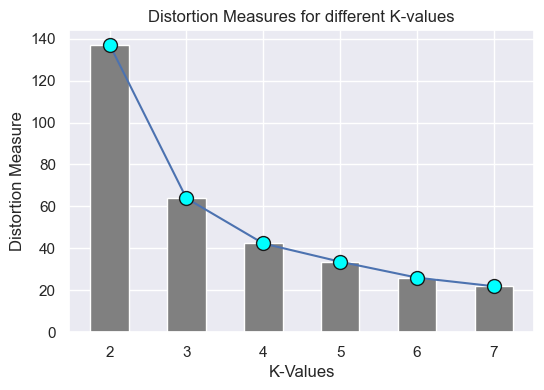

In [59]:
K_vals = [2, 3, 4, 5, 6, 7]
distortions = []

for K in K_vals:
    # Model
    kmeans_estimator = KMeans(n_clusters = K)
    kmeans_estimator.fit(projected)
    kmeans_prediction = kmeans_estimator.predict(projected)
    centers = kmeans_estimator.cluster_centers_
    
    clustered_df = pd.DataFrame({'Eig-1':projected[:,0], 'Eig-2':projected[:,1], 'Class':iris_df.Species, 'Cluster':kmeans_prediction})
    
    print("-"*70)
    print("K =", K)
    print()
    
    J = 0 #Initializing Distortion Measure
    
    # Scatter Plots of Data Points (Reduced along eigen-directions)
    plt.figure(dpi = 85)
    for cluster in set(clustered_df.Cluster):
        sub_df = clustered_df[clustered_df.Cluster == cluster]
        x = sub_df.iloc[:,0]
        y = sub_df.iloc[:,1]
        
        center = centers[cluster]
        for i in range(len(sub_df)):
            d = np.array([sub_df.iloc[i,0], sub_df.iloc[i,1]])
            temp = (d - center)
            J+= np.dot(temp.T, temp)
        
        
        plt.scatter(x, y, s = 9)
    plt.scatter(centers[:,0], centers[:,1], marker = 'x', c = 'k', s = 30, label = 'Cluster-Center')
    plt.xlabel("Eigen-Direction - 1")
    plt.ylabel("Eigen-Direction - 2")
    plt.title("FOR K = "+str(K), fontsize = 13)
    plt.legend()
    plt.show()
    
    print()
    print("Distortion Measure =", J)
    distortions.append(J)
    print()
    print("-"*70)
    
plt.figure(dpi = 100)
plt.bar(K_vals, distortions, color = 'grey', width = 0.5)
plt.plot(K_vals, distortions ,marker = 'o', markerfacecolor = 'cyan', markersize = 10, markeredgecolor = 'k')
plt.xlabel("K-Values")
plt.ylabel("Distortion Measure")
plt.title("Distortion Measures for different K-values")
plt.show()
        
    